<a href="https://colab.research.google.com/github/Meemansha-spec/meem.github.io/blob/master/coursera_Convolution_course_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cats vs dogs

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip



--2021-03-19 09:38:15--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.8.16, 172.217.15.80, 172.217.2.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.8.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   227MB/s    in 0.3s    

2021-03-19 09:38:16 (227 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
## validation data

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-03-19 09:38:18--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.208, 172.253.62.128, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.07s   

2021-03-19 09:38:19 (168 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [5]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [6]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir , 'train')
validation_dir = os.path.join(base_dir , 'validation')

train_cats_dir = os.path.join(train_dir,'cats')

train_dogs_dir = os.path.join(train_dir,'dogs')

# Directory with our training horse pictures
validation_cats_dir = os.path.join(validation_dir,'cats')

# Directory with our training human pictures
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [7]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
print(train_dog_fnames[:10])

['cat.645.jpg', 'cat.776.jpg', 'cat.155.jpg', 'cat.236.jpg', 'cat.987.jpg', 'cat.786.jpg', 'cat.787.jpg', 'cat.207.jpg', 'cat.827.jpg', 'cat.961.jpg']
['dog.164.jpg', 'dog.480.jpg', 'dog.484.jpg', 'dog.639.jpg', 'dog.998.jpg', 'dog.814.jpg', 'dog.309.jpg', 'dog.580.jpg', 'dog.259.jpg', 'dog.198.jpg']


In [8]:
print('total training cat images:' , len(os.listdir(train_cats_dir)))
print('total training dog images:' , len(os.listdir(train_dogs_dir)))


total training cat images: 1000
total training dog images: 1000


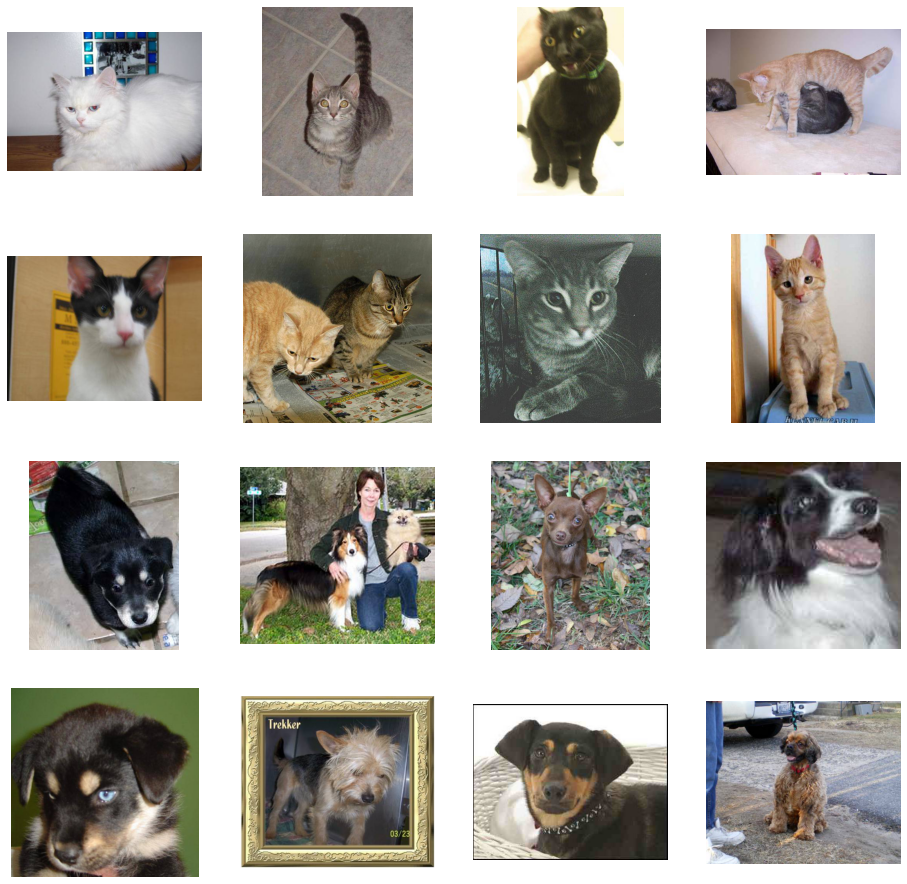

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4 
ncols = 4 ## parameters for our plot. we will o/p images in 4*4 configuration

## index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4 , nrows * 4)

pic_index +=8
next_cats_pix = [os.path.join(train_cats_dir , fname)
                 for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dogs_pix = [os.path.join(train_dogs_dir, fname)
                 for fname in train_dog_fnames[pic_index -8 :pic_index]]

for i , img_path in enumerate(next_cats_pix + next_dogs_pix):
  sp = plt.subplot(nrows , ncols , i+1)
  sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [11]:
import tensorflow as tf
import keras

In [12]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (150,150,3)),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512,activation = 'relu'),
tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [14]:
from tensorflow.keras.optimizers import RMSprop

In [32]:
model.compile(loss = 'binary_crossentropy',optimizer = RMSprop(lr = 0.001),metrics =['acc'])

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip = True,rotation_range=40,width_shift_range=0.2 , height_shift_range= 0.2 ,fill_mode= 'nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size = (150,150),batch_size = 20 , class_mode = 'binary')



validation_generator = test_datagen.flow_from_directory(validation_dir,target_size = (150,150),batch_size = 20 , class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [37]:
history = model.fit_generator(train_generator , steps_per_epoch = 100 , epochs = 100 , validation_data = validation_generator , validation_steps = 50 , verbose = 2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 - 16s - loss: 0.5158 - acc: 0.7575 - val_loss: 0.4559 - val_acc: 0.7870
Epoch 2/100
100/100 - 16s - loss: 0.5000 - acc: 0.7600 - val_loss: 0.6559 - val_acc: 0.7170
Epoch 3/100
100/100 - 16s - loss: 0.5137 - acc: 0.7575 - val_loss: 0.5894 - val_acc: 0.7280
Epoch 4/100
100/100 - 16s - loss: 0.5169 - acc: 0.7555 - val_loss: 0.4708 - val_acc: 0.7740
Epoch 5/100
100/100 - 16s - loss: 0.5084 - acc: 0.7490 - val_loss: 0.5410 - val_acc: 0.7470
Epoch 6/100
100/100 - 16s - loss: 0.5024 - acc: 0.7700 - val_loss: 0.4673 - val_acc: 0.7720
Epoch 7/100
100/100 - 16s - loss: 0.5064 - acc: 0.7545 - val_loss: 0.4594 - val_acc: 0.7840
Epoch 8/100
100/100 - 16s - loss: 0.5159 - acc: 0.7635 - val_loss: 0.4822 - val_acc: 0.7730
Epoch 9/100
100/100 - 16s - loss: 0.4995 - acc: 0.7600 - val_loss: 0.5196 - val_acc: 0.7620
Epoch 10/100
100/100 - 16s - loss: 0.5119 - acc: 0.7600 - val_loss: 0.4871 - val_acc: 0.7750
Epoch 11/100
100/100 - 16s - loss: 0.4939 - acc: 0.7665 - val_loss: 0.4605 - va

In [20]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")
 

Saving puppy-1903313_640.jpg to puppy-1903313_640 (2).jpg
Saving cat-551554_640.jpg to cat-551554_640 (2).jpg
[0.70954555]
puppy-1903313_640.jpg is a dog
[0.00373977]
cat-551554_640.jpg is a cat


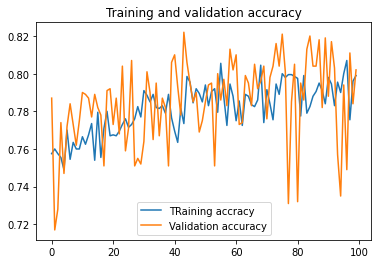

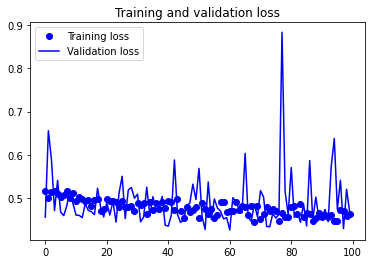

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,label = 'TRaining accracy')
plt.plot(epochs , val_acc , label = 'Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs , val_loss,'b',label = 'Validation loss')

plt.title('Training and validation loss')

plt.legend()
plt.show()

